# Análise Exploratória - PEDE 2024 (Datathon)

**Objetivo:** Explorar a base de dados para entender a distribuição do INDE e dos indicadores parciais. 
A ideia é validar se as colunas `ATINGIU PV` ou `Defasagem` servem como bons targets para previsão de risco.

**Pontos de atenção:**
- Verificar outliers no INDE (notas negativas ou > 10?)
- Tratamento de colunas numéricas que vieram como texto (vírgula decimal)
- Correlação entre as notas parciais (IEG, IPV, IDA) e o INDE final

In [1]:
%pip install pandas openpyxl matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configs
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

# Carregar base 2022 para exploração inicial
# As abas são 'PEDE2022', 'PEDE2023', 'PEDE2024'
file = '../arquivos/BASE DE DADOS PEDE 2024 - DATATHON.xlsx'

if os.path.exists(file):
    df_2022 = pd.read_excel(file, sheet_name='PEDE2022', engine='openpyxl')
    print(df_2022.shape)
else:
    print("Arquivo não encontrado!")

df_2022.head(3)

(860, 42)


,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,INDE 22,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,Rec Psicologia,IDA,Matem,Portug,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,Ametista,Quartzo,5.783,753,18,10,4,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,Ametista,Ametista,7.055,469,8,3,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,Ametista,Ágata,6.591,629,13,6,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...


In [ ]:
# Checando nulos e tipos
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     860 non-null    object 
 1   Fase                   860 non-null    int64  
 2   Turma                  860 non-null    object 
 3   Nome                   860 non-null    object 
 4   Ano nasc               860 non-null    int64  
 5   Idade 22               860 non-null    int64  
 6   Gênero                 860 non-null    object 
 7   Ano ingresso           860 non-null    int64  
 8   Instituição de ensino  860 non-null    object 
 9   Pedra 20               323 non-null    object 
 10  Pedra 21               462 non-null    object 
 11  Pedra 22               860 non-null    object 
 12  INDE 22                860 non-null    float64
 13  Cg                     860 non-null    int64  
 14  Cf                     860 non-null    int64  
 15  Ct    

In [4]:
# Estatística descritiva (INDE e parciais)
# Validar se o INDE está na escala esperada (0-10)
df_2022.describe()

,Fase,Ano nasc,Idade 22,Ano ingresso,INDE 22,Cg,Cf,Ct,Nº Av,IAA,IEG,IPS,IDA,Matem,Portug,Inglês,IPV,IAN,Defas
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,858.000000,858.000000,283.000000,860.000000,860.000000,860.000000
mean,2.098837,2009.861628,12.138372,2020.496512,7.036176,430.516279,75.519767,6.598837,3.054651,8.274419,7.891163,6.905000,6.092907,5.806876,6.320979,5.881272,7.253642,6.424419,-0.943023
std,1.788789,2.771998,2.771998,1.790217,1.017773,248.432761,52.312670,3.975858,0.775371,2.064935,1.638340,1.070707,2.046209,2.414215,2.080364,2.957315,1.093383,2.389609,0.845593
min,0.000000,2001.000000,7.000000,2016.000000,3.032000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000,-5.000000
25%,1.000000,2008.000000,10.000000,2019.000000,6.485500,215.750000,30.000000,3.000000,2.000000,7.900000,7.000000,6.300000,4.800000,4.300000,5.200000,3.500000,6.722000,5.000000,-1.000000
50%,2.000000,2010.000000,12.000000,2021.000000,7.197000,430.500000,67.000000,6.000000,3.000000,8.800000,8.300000,7.500000,6.300000,6.000000,6.700000,6.300000,7.333000,5.000000,-1.000000
75%,3.000000,2012.000000,14.000000,2022.000000,7.751250,645.250000,118.000000,9.000000,4.000000,9.500000,9.100000,7.500000,7.600000,7.800000,7.800000,8.500000,7.917000,10.000000,0.000000
max,7.000000,2015.000000,21.000000,2022.000000,9.442000,862.000000,192.000000,18.000000,4.000000,10.000000,10.000000,10.000000,9.900000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


C:\Users\Angélica\AppData\Local\Temp\ipykernel_1812\152679864.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_target, data=df_2022, palette='viridis')
C:\Users\Angélica\AppData\Local\Temp\ipykernel_1812\152679864.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col_target, y='INDE 22', data=df_2022, palette='Set2')


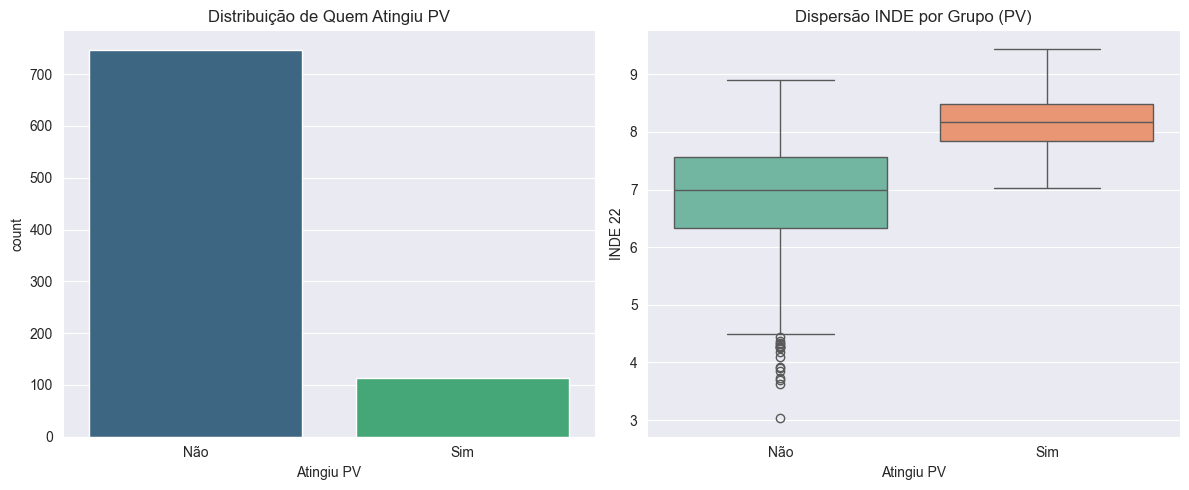

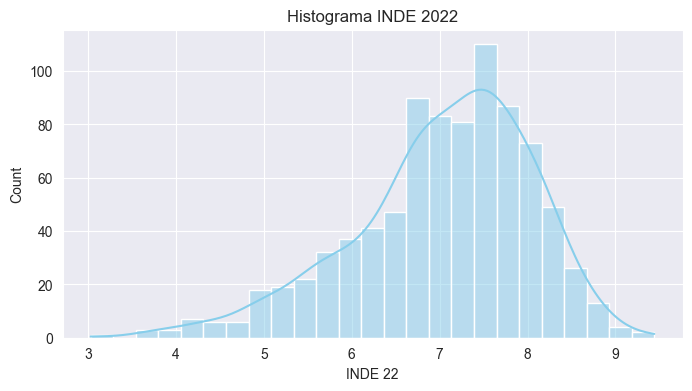

In [5]:
# Analisando Distribuição do Target: ATINGIU PV e INDE
col_target = 'Atingiu PV'

# Distribuição do TARGET (PV)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=col_target, data=df_2022, palette='viridis')
plt.title('Distribuição de Quem Atingiu PV')

# INDE vs PV 
plt.subplot(1, 2, 2)
sns.boxplot(x=col_target, y='INDE 22', data=df_2022, palette='Set2')
plt.title('Dispersão INDE por Grupo (PV)')
plt.tight_layout()
plt.show()

# Verificando Histograma do INDE
plt.figure(figsize=(8, 4))
sns.histplot(df_2022['INDE 22'], kde=True, color='skyblue')
plt.title('Histograma INDE 2022')
plt.show()

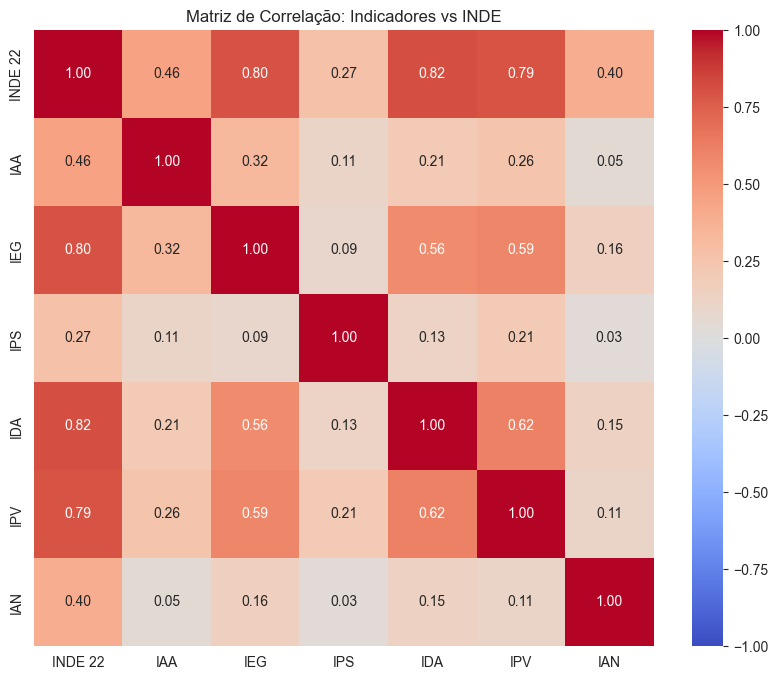

INDE 22    1.000000
IDA        0.817734
IEG        0.802061
IPV        0.789104
IAA        0.455175
IAN        0.395443
IPS        0.269371
Name: INDE 22, dtype: float64


In [7]:
# Correlações entre os parciais e INDE
# Colunas-chave para entender o que gera uma nota final alta
cols_metricas = [
    'INDE 22', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN'
]

# Garantir que s;o pegamos colunas que existem no ano (IPP as vezes não tem em 2022)
cols_disponiveis = [c for c in cols_metricas if c in df_2022.columns]

# Tentar converter tudo que é numérico pra float (replace vírgula)
# A função to_numeric + errors='coerce' cuida dos nulos/textos estranhos
df_corr = df_2022[cols_disponiveis].copy()
for col in cols_disponiveis:
    if df_corr[col].dtype == 'object':
        df_corr[col] = pd.to_numeric(df_corr[col].astype(str).str.replace(',', '.'), errors='coerce')

# Gerar Matriz de Correlação
corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlação: Indicadores vs INDE')
plt.show()

# Importância: As colunas com maior correlacao com INDE devem ser mantidas no modelo.
# IAA, IEG e IDA parecem ter correlações fortes.
if 'INDE 22' in corr_matrix.columns:
    print(corr_matrix['INDE 22'].sort_values(ascending=False))

### Conclusões Preliminares

1. **Definição de Target**:
   - `ATINGIU PV` (Ponto de Virada) é binário, mas parece ter forte relação com o `INDE`.
   - `Defasagem` (Discrepância Idade-Série) pode ser outro alvo importante, especialmente para intervenção precoce.

2. **Qualidade dos Dados**:
   - Muitas colunas numéricas estão formatadas com vírgula decimal (texto). Precisarão de pré-processamento robusto.
   - Nulos devem ser tratados com imputação (mediana/moda) para não perder muitos registros.

3. **Features Promissoras**:
   - `IAA`, `IEG`, `IDA` mostraram correlação positiva forte com o desempenho geral (`INDE`).
   - `IPV` (Ponto de Virada) parece ter uma distribuição distinta entre os grupos.

**Próximo Passo**: Pipeline de limpeza e feature engineering (tratar `Fase`, `Pedra` e nulos).